#Importation des Bibliothéque

In [1]:
import numpy as np
np.set_printoptions(threshold=1000,suppress=True)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#Partie 1 preProcessing & verrification

In [2]:
credit_scoring=pd.read_csv('credit_scoring.csv',sep=';',header=0) # read Data
credit_scoring.head() #by default show the 5 first lines

,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price,Status
0,9.0,1.0,60.0,30.0,0.0,1.0,1.0,73.0,129.0,0.0,0.0,800.0,846.0,1
1,17.0,1.0,60.0,58.0,1.0,1.0,0.0,48.0,131.0,0.0,0.0,1000.0,1658.0,1
2,10.0,0.0,36.0,46.0,0.0,2.0,1.0,90.0,200.0,3000.0,0.0,2000.0,2985.0,0
3,0.0,1.0,60.0,24.0,1.0,1.0,0.0,63.0,182.0,2500.0,0.0,900.0,1325.0,1
4,0.0,1.0,36.0,26.0,1.0,1.0,0.0,46.0,107.0,0.0,0.0,310.0,910.0,1


In [3]:
credit_scoring.shape #data dimension 4375 rows & 14 cols

(4375, 14)

In [4]:
features_names=list(credit_scoring.columns) #features names
features_names

['Seniority',
 'Home',
 'Time',
 'Age',
 'Marital',
 'Records',
 'Job',
 'Expenses',
 'Income',
 'Assets',
 'Debt',
 'Amount',
 'Price',
 'Status']

In [5]:
credit_scoring.info() #information on data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4375 entries, 0 to 4374
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seniority  4375 non-null   float64
 1   Home       4375 non-null   float64
 2   Time       4375 non-null   float64
 3   Age        4375 non-null   float64
 4   Marital    4375 non-null   float64
 5   Records    4375 non-null   float64
 6   Job        4375 non-null   float64
 7   Expenses   4375 non-null   float64
 8   Income     4375 non-null   float64
 9   Assets     4375 non-null   float64
 10  Debt       4375 non-null   float64
 11  Amount     4375 non-null   float64
 12  Price      4375 non-null   float64
 13  Status     4375 non-null   int64  
dtypes: float64(13), int64(1)
memory usage: 478.6 KB


In [6]:
credit_scoring.isnull().sum() # verrification of missing values "Data seen perfect"

Seniority    0
Home         0
Time         0
Age          0
Marital      0
Records      0
Job          0
Expenses     0
Income       0
Assets       0
Debt         0
Amount       0
Price        0
Status       0
dtype: int64

#Statistique

In [7]:
credit_scoring.describe() # some statics information about our data

,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price,Status
count,4375.000000,4375.000000,4375.000000,4375.000000,4375.000000,4375.000000,4375.000000,4375.000000,4375.000000,4375.000000,4375.000000,4375.000000,4375.000000,4375.000000
mean,7.985143,0.528229,46.518857,37.021714,0.271086,1.172114,0.364114,55.595200,130.848914,5298.431314,342.551543,1037.463771,1459.732343,0.722057
std,8.173922,0.499260,14.619282,10.973187,0.444571,0.377523,0.481236,19.451569,86.199518,10582.377366,1217.622800,469.753531,621.775995,0.448036
min,0.000000,0.000000,6.000000,18.000000,0.000000,1.000000,0.000000,35.000000,0.000000,0.000000,0.000000,100.000000,105.000000,0.000000
25%,2.000000,0.000000,36.000000,28.000000,0.000000,1.000000,0.000000,35.000000,80.000000,0.000000,0.000000,700.000000,1116.500000,0.000000
50%,5.000000,1.000000,48.000000,36.000000,0.000000,1.000000,0.000000,51.000000,120.000000,3000.000000,0.000000,1000.000000,1400.000000,1.000000
75%,12.000000,1.000000,60.000000,45.000000,1.000000,1.000000,1.000000,72.000000,165.000000,6000.000000,0.000000,1300.000000,1688.000000,1.000000
max,48.000000,1.000000,72.000000,68.000000,1.000000,2.000000,1.000000,173.000000,959.000000,250000.000000,30000.000000,4500.000000,11140.000000,1.000000


In [8]:
credit_scoring['Status'].value_counts()

1    3159
0    1216
Name: Status, dtype: int64

In [9]:
credit_scoring['Status'].value_counts(normalize='True') #72% status=1 27% =0

1    0.722057
0    0.277943
Name: Status, dtype: float64

#Boxplot

In [10]:
sns.set(style='whitegrid')
num_features=['Age','Seniority','Expenses']

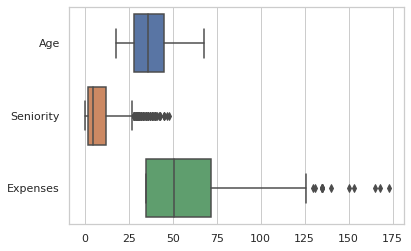

In [11]:
ax=sns.boxplot(data=credit_scoring[num_features],orient='h')

#Histogramme

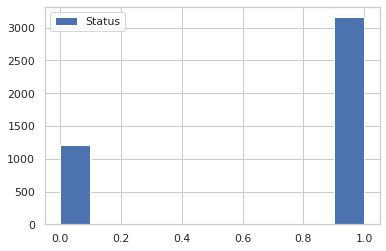

In [12]:
plt.hist(credit_scoring['Status'],label='Status')
plt.legend()

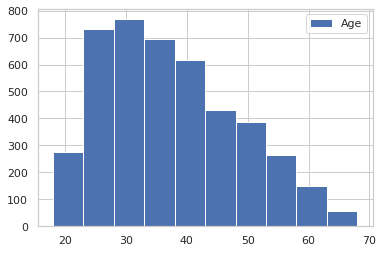

In [13]:
plt.hist(credit_scoring['Age'],label='Age')
plt.legend()

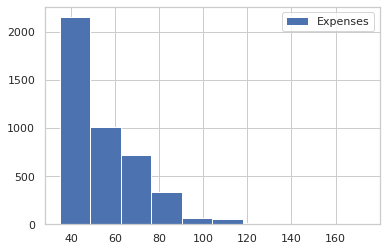

In [14]:
plt.hist(credit_scoring['Expenses'],label='Expenses')
plt.legend()

#Data visualization with Status

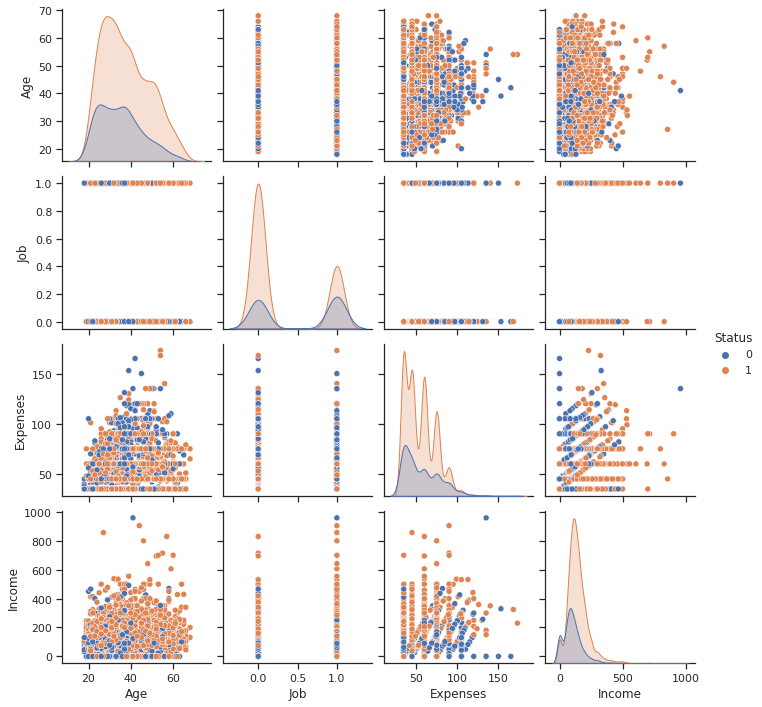

In [15]:
sns.set(style='ticks')
sns.pairplot(credit_scoring[['Age','Job','Expenses','Income','Status']],hue='Status')

In [16]:
credit_scoring['Status'].mean()

0.7220571428571428

In [17]:
credit_scoring[credit_scoring['Status']==0].mean()

Seniority       4.510691
Home            0.697368
Time           49.026316
Age            35.244243
Marital         0.337171
Records         1.340461
Job             0.526316
Expenses       56.526316
Income        102.248355
Assets       3472.564145
Debt          353.908717
Amount       1153.086349
Price        1463.875000
Status          0.000000
dtype: float64

In [18]:
features_means=['Seniority','Home','Time','Age','Marital','Records','Job','Expenses','Income']

In [19]:
mean_credit_scoring=pd.DataFrame({'Status=1':credit_scoring[credit_scoring['Status']==1].mean(),\
                              'NoStatus=0':credit_scoring[credit_scoring['Status']==0].mean(),\
                              'all':credit_scoring.mean()},
                             index=features_means)

In [20]:
mean_credit_scoring

,Status=1,NoStatus=0,all
Seniority,9.322570,4.510691,7.985143
Home,0.463121,0.697368,0.528229
Time,45.553656,49.026316,46.518857
Age,37.705920,35.244243,37.021714
Marital,0.245647,0.337171,0.271086
Records,1.107312,1.340461,1.172114
Job,0.301678,0.526316,0.364114
Expenses,55.236784,56.526316,55.595200
Income,141.858183,102.248355,130.848914


#Phase 2 Taining & testing

In [21]:
X=credit_scoring.iloc[:,0:13]
Y=credit_scoring['Status']
X=X.values
Y=Y.values

In [22]:
ep=np.sum(Y==1)/len(Y)
nep=np.sum(Y==0)/len(Y)
print('Status=1: {0:.3f} et status=0 : {1:.3f}'.format(ep,nep))

Status=1: 0.722 et status=0 : 0.278


In [23]:
credit_scoring['Status'].value_counts(normalize='True') #72% status=1 27% =0

1    0.722057
0    0.277943
Name: Status, dtype: float64

# 2 Apprentissage

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,mean_squared_error

from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.ensemble import ExtraTreesClassifier

In [25]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,Y,test_size=0.5,random_state=1)

In [26]:
Xtrain.shape

(2187, 13)

In [27]:
def ClassifieurStatus(Xtrain,Ytrain,Xtest,Ytest):
  print('DecisionTreeClassifier')
  DT = DecisionTreeClassifier(random_state=0, criterion='entropy')
  DT.fit(Xtrain,Ytrain)#apprentissage
  YDT = DT.predict(Xtest)#prediction
  errorTest=mean_squared_error(Ytest,YDT)
  acc1 = accuracy_score(Ytest,YDT)
  pre1 = recall_score(Ytest,YDT)
  score1= (acc1+pre1)/2
  print('>Score = {0:.3f}'.format(score1))
  print('error de test=',errorTest)
  print()
  print()

  print('KNN neighbors')
  KNN= KNeighborsClassifier(n_neighbors=5)
  KNN.fit(Xtrain,Ytrain)
  YKNN=KNN.predict(Xtest)
  errorTest=mean_squared_error(Ytest,YKNN)
  acc3 = accuracy_score(Ytest,YKNN)
  pre3 = recall_score(Ytest,YKNN)
  score3= (acc3+pre3)/2
  print('>Score = {0:.3f}'.format(score3))
  print('error de test=',errorTest)
  print()
  print()

  print('MLPClassifier')
  MLP = MLPClassifier(hidden_layer_sizes=(20,10),alpha=0.001,max_iter=200)
  MLP.fit(Xtrain,Ytrain)
  YMLP = MLP.predict(Xtest)
  errorTest=mean_squared_error(Ytest,YMLP)
  acc2 = accuracy_score(Ytest,YMLP)
  pre2 = recall_score(Ytest,YMLP)
  score2= (acc2+pre2)/2
  print('>Score = {0:.3f}'.format(score2))
  print('error de test=',errorTest)
  print()
  print()

  print('Random Forest')
  RF= RandomForestClassifier(n_estimators=50, random_state=1)
  RF.fit(Xtrain,Ytrain)
  YRF=RF.predict(Xtest)
  errorTest=mean_squared_error(Ytest,YRF)
  acc4 = accuracy_score(Ytest,YRF)
  pre4 = recall_score(Ytest,YRF)
  score4= (acc4+pre4)/2
  print('>Score = {0:.3f}'.format(score4))
  print('error de test=',errorTest)
  print()
  print()

  print('AdacBoost')
  AdaC=AdaBoostClassifier(n_estimators=50, random_state=0)
  AdaC.fit(Xtrain,Ytrain)
  YAdaC=AdaC.predict(Xtest)
  errorTest=mean_squared_error(Ytest,YAdaC)
  acc5 = accuracy_score(Ytest,YAdaC)
  pre5 = recall_score(Ytest,YAdaC)
  score5= (acc5+pre5)/2
  print('>Score = {0:.3f}'.format(score5))
  print('error de test=',errorTest)
  print()
  print()

  print('extra tree')
  ExtC=ExtraTreesClassifier(n_estimators=100, random_state=0)
  ExtC.fit(Xtrain,Ytrain)
  YExtC=ExtC.predict(Xtest)
  errorTest=mean_squared_error(Ytest,YExtC)
  acc6 = accuracy_score(Ytest,YExtC)
  pre6 = recall_score(Ytest,YExtC)
  score6= (acc6+pre6)/2
  print('>Score = {0:.3f}'.format(score6))
  print('error de test=',errorTest)
  print()
  print()

In [28]:
ClassifieurStatus(Xtrain,Ytrain,Xtest,Ytest)

DecisionTreeClassifier
>Score = 0.757
error de test= 0.27925045703839124


KNN neighbors
>Score = 0.803
error de test= 0.27513711151736747


MLPClassifier
>Score = 0.778
error de test= 0.2577696526508227


Random Forest
>Score = 0.838
error de test= 0.21252285191956125


AdacBoost
>Score = 0.840
error de test= 0.21389396709323583


extra tree
>Score = 0.832
error de test= 0.2253199268738574




# 3 Normalisation

In [29]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [30]:
ss = StandardScaler()
ss.fit(Xtrain)
Xtrain_norm=ss.transform(Xtrain)
Xtest_norm=ss.transform(Xtest)

In [31]:
ClassifieurStatus(Xtrain,Ytrain,Xtest,Ytest)

DecisionTreeClassifier
>Score = 0.757
error de test= 0.27925045703839124


KNN neighbors
>Score = 0.803
error de test= 0.27513711151736747


MLPClassifier
>Score = 0.730
error de test= 0.2856489945155393


Random Forest
>Score = 0.838
error de test= 0.21252285191956125


AdacBoost
>Score = 0.840
error de test= 0.21389396709323583


extra tree
>Score = 0.832
error de test= 0.2253199268738574




#4 PCA

In [32]:
from sklearn.decomposition import PCA

In [33]:
pca= PCA(n_components=3)
pca.fit(Xtrain_norm)
Xtrain_pca=pca.transform(Xtrain_norm)
Xtest_pca=pca.transform(Xtest_norm)

Xtrain_pca = np.concatenate((Xtrain_norm,Xtrain_pca),axis=1)
Xtest_pca = np.concatenate((Xtest_norm,Xtest_pca),axis=1)

In [34]:
ClassifieurStatus(Xtrain_pca,Ytrain,Xtest_pca,Ytest)

DecisionTreeClassifier
>Score = 0.752
error de test= 0.2806215722120658


KNN neighbors
>Score = 0.811
error de test= 0.24360146252285192


MLPClassifier
>Score = 0.827
error de test= 0.21755027422303475


Random Forest
>Score = 0.845
error de test= 0.2042961608775137


AdacBoost
>Score = 0.838
error de test= 0.21709323583180987


extra tree
>Score = 0.827
error de test= 0.22943327239488118




# 5 Paramétrage des classifieurs Knneighbors

In [35]:
from sklearn.model_selection import GridSearchCV

In [36]:
parametres={'n_neighbors':[2,5,15, 30, 45, 64]} #Tester toutes les possibilités dans l'algorithme choisi

model=KNeighborsClassifier()
GS=GridSearchCV(model,parametres, cv=10,scoring='accuracy')

GS.fit(Xtrain_pca,Ytrain)
GS.best_params_

{'n_neighbors': 15}

#Paramétrage de classifieurs Tree Decision

In [37]:
parametres={'criterion':['gini','entropy'],'max_depth':[5,10,15,20,30,40,60,80,150,200,300,400,500,700,900,1200,1500]}
model=DecisionTreeClassifier()
GS=GridSearchCV(model,parametres, cv=5,scoring='accuracy')
GS.fit(Xtrain_pca,Ytrain)
GS.best_params_

{'criterion': 'entropy', 'max_depth': 5}

# 6 PipeLine Knn neighbors

In [38]:
from sklearn.pipeline import Pipeline
import pickle #pour stocker les fichiers exécutables
from sklearn.pipeline import FeatureUnion

In [39]:
P=Pipeline([
('ss',StandardScaler()),
('FU',FeatureUnion([('ss',StandardScaler()),("pca", PCA(n_components=3))])),
('Knn',KNeighborsClassifier(n_neighbors=15))
])

P.fit(X,Y)
pickle.dump(P,open('classifieurFinalKnn.pkl','wb'))

#Pipeline Decision Tree

In [40]:
P=Pipeline([
('ss',StandardScaler()),
('FU',FeatureUnion([('ss',StandardScaler()),("pca", PCA(n_components=3))])),
('DT',DecisionTreeClassifier(criterion='entropy',max_depth=5))
])

P.fit(X,Y)
pickle.dump(P,open('classifieurFinalDecisionTree.pkl','wb'))